##### H0 = No difference in the mean of population or group 
##### Ha = There is difference in the mean of population or group 
##### Alpha = 0.05 

In [2]:
  library(tidyverse)
  library(datarium)
  library(ggstatsplot) 
  library(ISLR)
  library(ISLR2)
  library(readxl)
  library(dplyr) 
  library(gapminder)
  library(psych)
  library(effectsize)
  library(GGally)
  library(PerformanceAnalytics)
  library(dlookr)
  library(flextable) 
  library(survival)
  library(MVN)
  library(tinystatr)
  library(ggplot2)
  library(ggpubr)
  library(emmeans)
  library(quantreg)
  library(sjPlot)
  library(rsample)
  library(tidymodels)
  library(SmartEDA)
  library(summarytools)
  library(gtsummary)
  library(DataExplorer)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
You can cite this package as:
     Patil, I. (2021). Visualizations with statistical details: The 'ggstatsplot' approach.
     Journal of Open Source Software, 6(61), 3167, doi:10.21105/joss.03167


Attache Paket: ‘ISLR2’


Die folgenden Objekte sind maskiert von ‘package:ISLR’:

    Auto, Credit



Attache Paket: ‘psych’


Die folgenden Objekte sind maskiert von ‘package:ggplot2’:

    %+%, alpha



Attache Paket: ‘effectsize’


Das folgende Objekt ist maskiert ‘package:

### read data from library datarium

In [3]:
dataan <- anxiety
dataan

id,group,t1,t2,t3
<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,grp1,14.1,14.4,14.1
2,grp1,14.5,14.6,14.3
3,grp1,15.7,15.2,14.9
4,grp1,16.0,15.5,15.3
5,grp1,16.5,15.8,15.7
6,grp1,16.9,16.5,16.2
7,grp1,17.0,16.8,16.5
8,grp1,17.0,17.1,16.6
9,grp1,17.3,16.9,16.5


In [4]:
dataan_longer <- dataan %>%
  pivot_longer(cols = 3:5,
               names_to = "observation",
               values_to = "reads")
dataan_longer

id,group,observation,reads
<fct>,<fct>,<chr>,<dbl>
1,grp1,t1,14.1
1,grp1,t2,14.4
1,grp1,t3,14.1
2,grp1,t1,14.5
2,grp1,t2,14.6
2,grp1,t3,14.3
3,grp1,t1,15.7
3,grp1,t2,15.2
3,grp1,t3,14.9


In [5]:
# we check the data for normal distribution
shapiro.test(dataan_longer $ reads)


	Shapiro-Wilk normality test

data:  dataan_longer$reads
W = 0.98698, p-value = 0.2316


#### Bartlett test: to check the homogeneity of variances

In [6]:
bartlett.test(reads ~ observation, data = dataan_longer)


	Bartlett test of homogeneity of variances

data:  reads by observation
Bartlett's K-squared = 3.3527, df = 2, p-value = 0.1871


In [7]:
aov_model <- aov(reads ~ observation, data = dataan_longer)
summary(aov_model)

             Df Sum Sq Mean Sq F value   Pr(>F)    
observation   2   66.6   33.29   10.84 4.38e-05 ***
Residuals   132  405.4    3.07                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [8]:
TukeyHSD(aov_model)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = reads ~ observation, data = dataan_longer)

$observation
            diff       lwr         upr     p adj
t2-t1 -0.7800000 -1.655747  0.09574702 0.0914210
t3-t1 -1.7177778 -2.593525 -0.84203076 0.0000236
t3-t2 -0.9377778 -1.813525 -0.06203076 0.0327338


In [9]:
write.csv(dataan_longer, "anxity.csv")

### just testing ####

In [10]:
# Set seed for reproducibility
set.seed(123)

# Generate sample data
pre_test <- rnorm(20, mean = 10, sd = 2)
post_test <- pre_test + rnorm(20, mean = 2, sd = 1)

# Create a data frame
data <- data.frame(PreTest = pre_test, PostTest = post_test)


data


PreTest,PostTest
<dbl>,<dbl>
8.879049,9.811225
9.539645,11.321670
13.117417,14.091412
10.141017,11.412126
10.258575,11.633536
13.430130,13.743437
10.921832,13.759619
7.469878,9.623251
8.626294,9.488157


In [11]:
# Perform Wilcoxon Signed Rank Test
wilcox.test(data$PreTest, data$PostTest, paired = TRUE)



	Wilcoxon signed rank exact test

data:  data$PreTest and data$PostTest
V = 0, p-value = 1.907e-06
alternative hypothesis: true location shift is not equal to 0


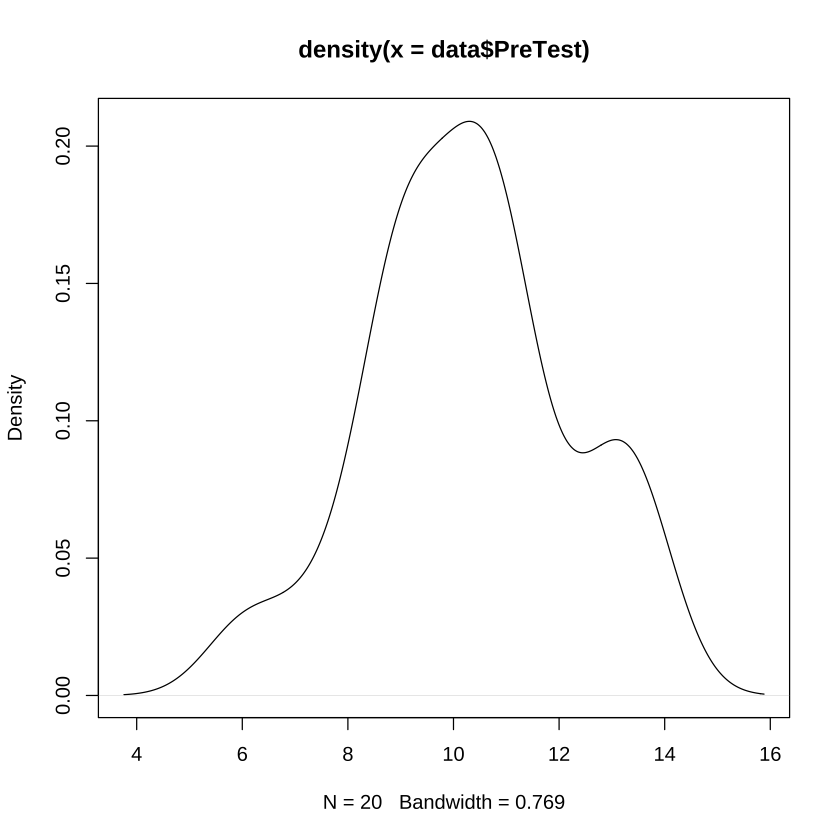

integer(0)


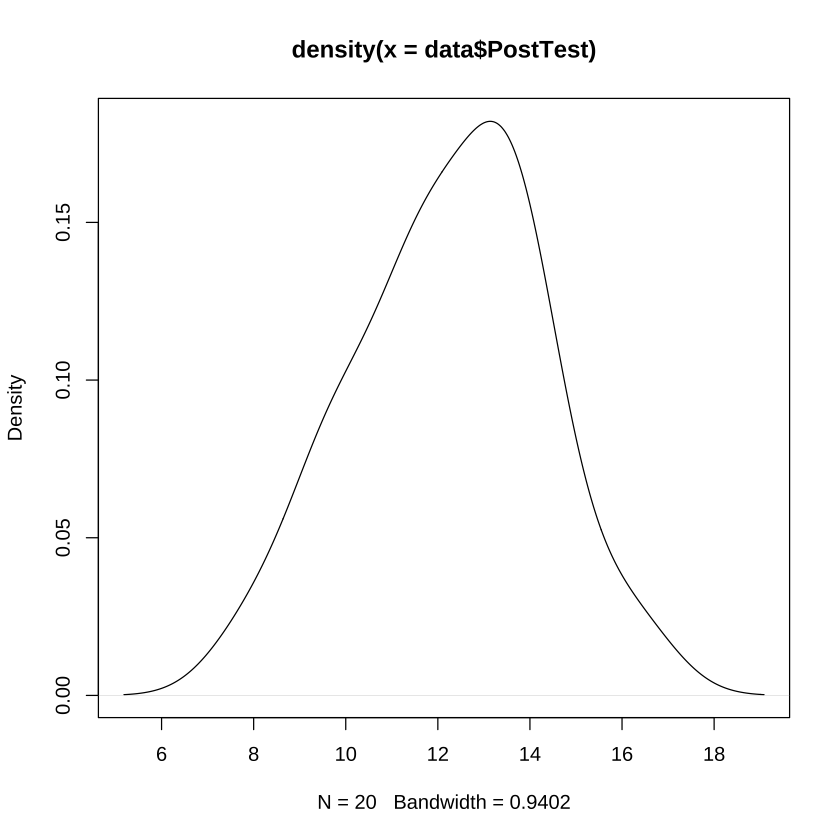

In [12]:
test1 <- plot(density(data$PreTest))
test2 <- plot(density(data$PostTest))
test <- test1+ test2
print(test)

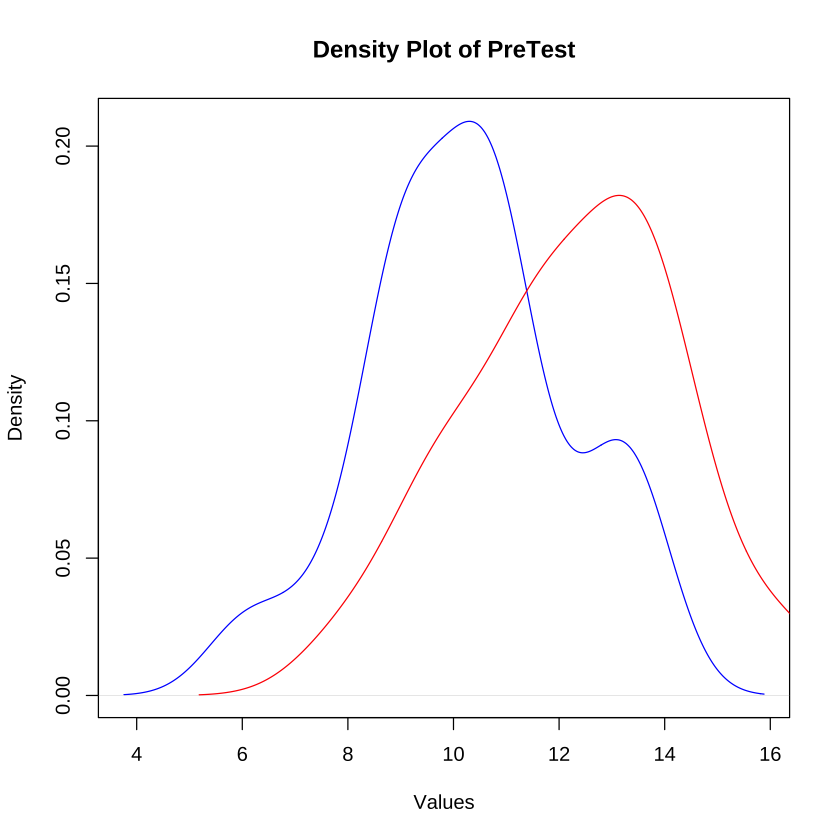

In [44]:
# Plot density of PreTest
test1 <- density(data$PreTest)
plot(test1, main = "Density Plot of PreTest", xlab = "Values", col = "blue")

# Add abline to the first plot
##abline(v = mean(data$PreTest), col = "green", lwd = 2)

# Plot density of PostTest
test2 <- density(data$PostTest)
lines(test2, col = "red")

# Add abline to the second plot
#abline(v = mean(data$PostTest), col = "orange", lwd = 2)

# Add legend
#legend("topright", legend = c("PreTest", "PostTest"), col = c("blue", "red"), lty = 1)

# Print the plot



In [14]:
mean(data$PreTest)
mean(data$PostTest)

[1] 10.28325

[1] 12.23199

In [15]:
cd133DMSO = read.delim("/Volumes/NGS/Myytcode/codeforytv/CD133 DMSO Control normalized (RMA).txt")
cd133EXP = read.delim("/Volumes/NGS/Myytcode/codeforytv/CD133 DMSO Experiment normalized (RMA).txt")

In [16]:
allcd133 <- left_join(cd133DMSO, cd133EXP, by = "ID")
allcd133

ID,DMSO.CD133.N.1.ga.cel,DMSO.CD133.N.2.ga.cel,DMSO.CD133.N.3.ga.cel,DMSO.CD133.NR.ga.cel,DMSO.CD133.P.1.ga.cel,DMSO.CD133.P.2.ga.cel,DMSO.CD133.P.3.ga.cel,DMSO.CD133.PR.ga.cel
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1007_PM_s_at,8.885362,8.613698,7.628713,7.640883,8.736861,8.600804,7.498251,7.506411
1053_PM_at,5.594371,5.864095,7.250735,7.039113,6.046368,6.106366,7.227457,7.044297
117_PM_at,3.151293,3.359443,2.987656,3.127865,3.379536,3.386184,3.071770,3.067604
121_PM_at,5.728864,5.608865,5.518192,5.694289,5.630234,5.570508,5.610709,5.846937
1255_PM_g_at,2.885118,2.664795,2.623704,2.678880,2.762519,2.739002,2.657027,2.718653
1294_PM_at,3.888597,3.940705,3.362582,3.293179,3.514136,3.563783,3.218820,3.360508
1316_PM_at,4.926180,4.931900,5.033186,4.571066,4.822719,4.706626,4.740242,4.981946
1320_PM_at,3.773307,3.534339,3.671815,3.466012,3.389212,3.618355,3.554816,3.620228
1405_PM_i_at,2.288410,2.319572,2.186705,2.326173,2.275394,2.243246,2.243262,2.364399


In [17]:
allcd133_1 <- allcd133 %>% 
select(1:9) %>% 
filter(grepl("_PM_at" , ID)) %>% 
mutate(DMSO1 = 2^(DMSO.CD133.N.1.ga.cel),
       DMSO2 = 2^(DMSO.CD133.N.2.ga.cel),
       DMSO3 = 2^(DMSO.CD133.N.3.ga.cel),
       DMSO4 = 2^(DMSO.CD133.NR.ga.cel),
       DMSO5 = 2^(DMSO.CD133.P.1.ga.cel),
       DMSO6 = 2^(DMSO.CD133.P.2.ga.cel),
       DMSO7 = 2^(DMSO.CD133.P.3.ga.cel),
       DMSO8 = 2^(DMSO.CD133.PR.ga.cel),
       average_DMSO1 = (DMSO1+DMSO2+DMSO3+DMSO4)/4,
       average_DMSO2 = (DMSO4+DMSO5+DMSO6+DMSO7)/4,
       FC = average_DMSO1/average_DMSO2)	%>%
       filter(FC > 1,5 | FC < -1.5)

In [18]:
d<-mtcars %>%
mutate(cyl = factor(cyl),
am = factor(am),
gear = factor(gear))


In [19]:
aov(mpg~cyl,d) %>% 
  summary()

            Df Sum Sq Mean Sq F value   Pr(>F)    
cyl          2  824.8   412.4    39.7 4.98e-09 ***
Residuals   29  301.3    10.4                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Call:
lm(formula = mpg ~ cyl, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.2636 -1.8357  0.0286  1.3893  7.2364 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  26.6636     0.9718  27.437  < 2e-16 ***
cyl6         -6.9208     1.5583  -4.441 0.000119 ***
cyl8        -11.5636     1.2986  -8.905 8.57e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.223 on 29 degrees of freedom
Multiple R-squared:  0.7325,	Adjusted R-squared:  0.714 
F-statistic:  39.7 on 2 and 29 DF,  p-value: 4.979e-09


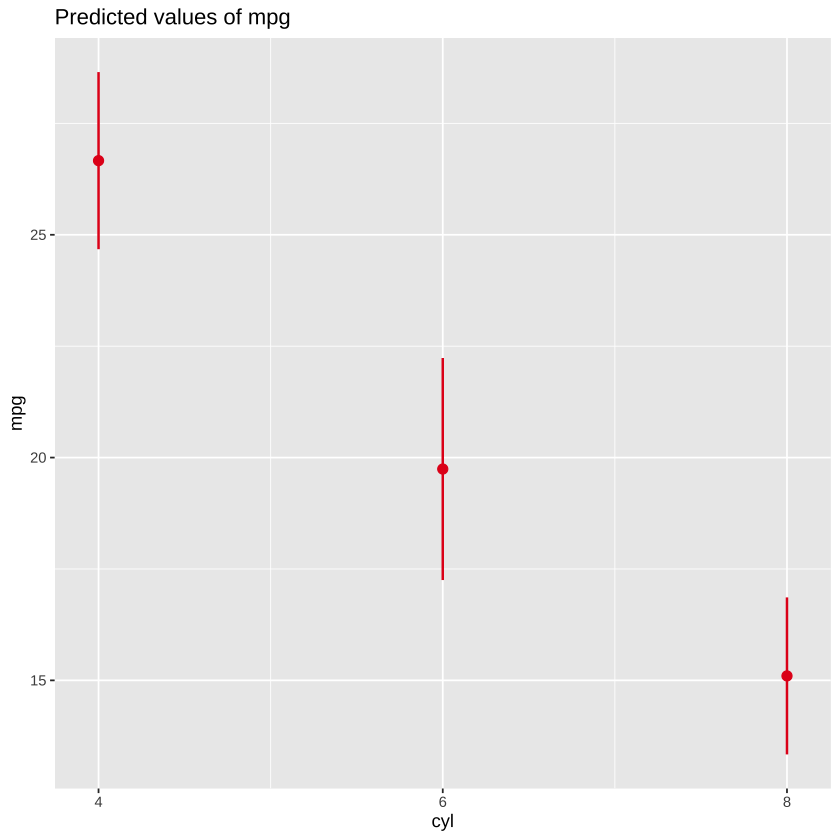

In [20]:
##liner model

m <- lm(mpg ~ cyl, d)
m %>%  summary()
plot_model(m, type = "pred", term = "cyl")

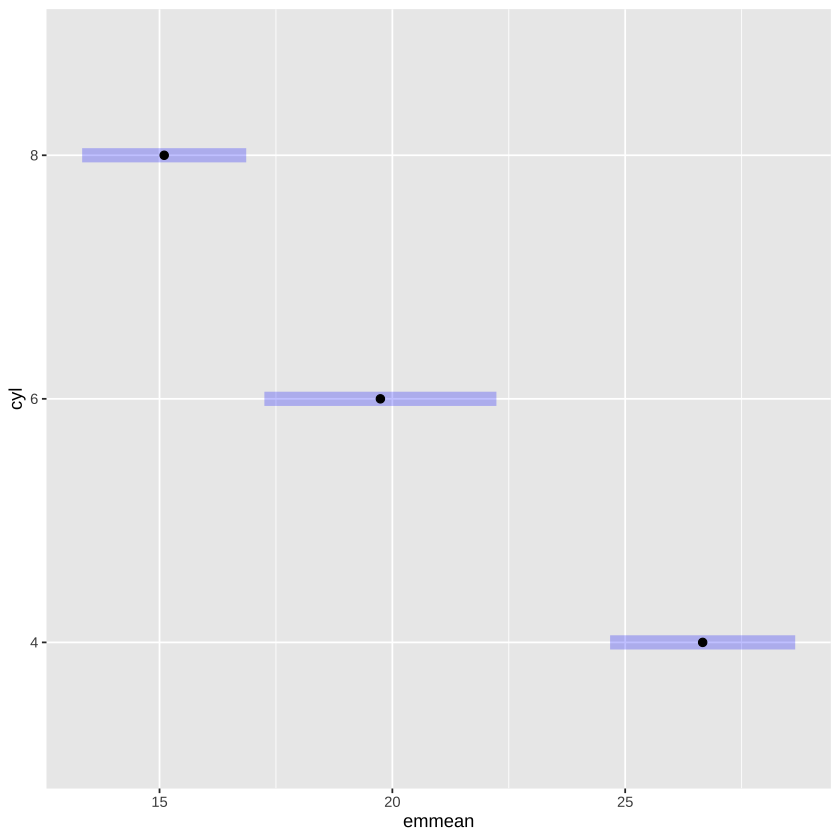

In [21]:
lm(mpg ~ cyl, d) %>%
emmeans(pairwise ~ cyl) %>% plot()

In [22]:
glm(am ~ cyl, d, family = binomial) %>%
emmeans( ~ cyl, type = "response") 

 cyl  prob     SE  df asymp.LCL asymp.UCL
 4   0.727 0.1343 Inf     0.414     0.910
 6   0.429 0.1870 Inf     0.144     0.770
 8   0.143 0.0935 Inf     0.036     0.427

Confidence level used: 0.95 
Intervals are back-transformed from the logit scale 

In [23]:
m <- lm(mpg ~ gear + am + hp, d)
ref_grid(m)
mean(d$hp)

 gear am  hp prediction    SE df
 3    0  147       18.0 0.818 27
 4    0  147       18.1 1.545 27
 5    0  147       20.4 2.331 27
 3    1  147       22.1 1.958 27
 4    1  147       22.2 1.226 27
 5    1  147       24.5 1.409 27


[1] 146.6875

In [24]:
m <- lm(mpg ~ cyl, d)
ref_grid(m)
emmeans(m, pairwise ~ cyl) %>% summary()

 cyl prediction    SE df
 4         26.7 0.972 29
 6         19.7 1.218 29
 8         15.1 0.861 29


,cyl,emmean,SE,df,lower.CL,upper.CL
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4,26.66364,0.9718008,29,24.67608,28.65119
2,6,19.74286,1.2182168,29,17.25132,22.23439
3,8,15.10000,0.8614094,29,13.33822,16.86178
,contrast,estimate,SE,df,t.ratio,p.value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,cyl4 - cyl6,6.920779,1.558348,29,4.441099,3.423720e-04
2,cyl4 - cyl8,11.563636,1.298623,29,8.904534,2.543980e-09
3,cyl6 - cyl8,4.642857,1.492005,29,3.111825,1.122868e-02


In [25]:
emmeans(m, pairwise ~ cyl, adjust = "BH")$contrasts #%>% summary()

 contrast    estimate   SE df t.ratio p.value
 cyl4 - cyl6     6.92 1.56 29   4.441  0.0002
 cyl4 - cyl8    11.56 1.30 29   8.905  <.0001
 cyl6 - cyl8     4.64 1.49 29   3.112  0.0042

P value adjustment: BH method for 3 tests 

In [26]:
emmeans(m, pairwise ~cyl, infer = T)$contrasts %>% summary()

,contrast,estimate,SE,df,lower.CL,upper.CL,t.ratio,p.value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,cyl4 - cyl6,6.920779,1.558348,29,3.0722086,10.769350,4.441099,3.423720e-04
2,cyl4 - cyl8,11.563636,1.298623,29,8.3564942,14.770779,8.904534,2.543980e-09
3,cyl6 - cyl8,4.642857,1.492005,29,0.9581313,8.327583,3.111825,1.122868e-02


In [27]:
emmeans(m, ~ cyl)

 cyl emmean    SE df lower.CL upper.CL
 4     26.7 0.972 29     24.7     28.7
 6     19.7 1.218 29     17.3     22.2
 8     15.1 0.861 29     13.3     16.9

Confidence level used: 0.95 

##### plot any CIs

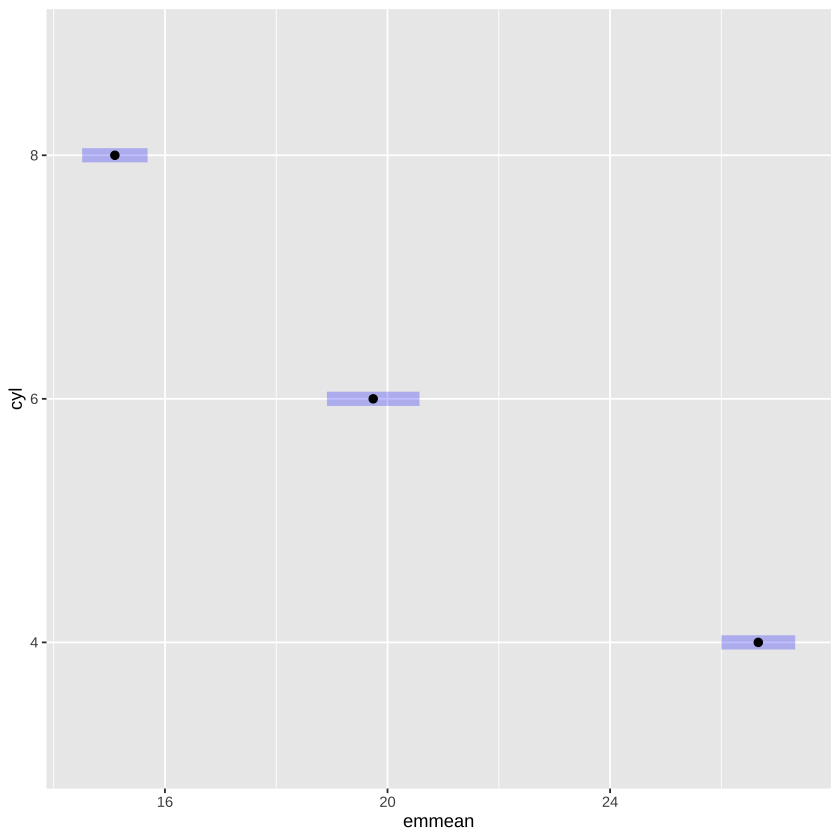

In [28]:
emmeans(m, pairwise ~ cyl, level = 0.5)$emmeans %>% plot()

## single numeric predictor

In [29]:
m <- lm(mpg ~ hp, d)
emmeans(m, ~ hp)

  hp emmean    SE df lower.CL upper.CL
 147   20.1 0.683 30     18.7     21.5

Confidence level used: 0.95 

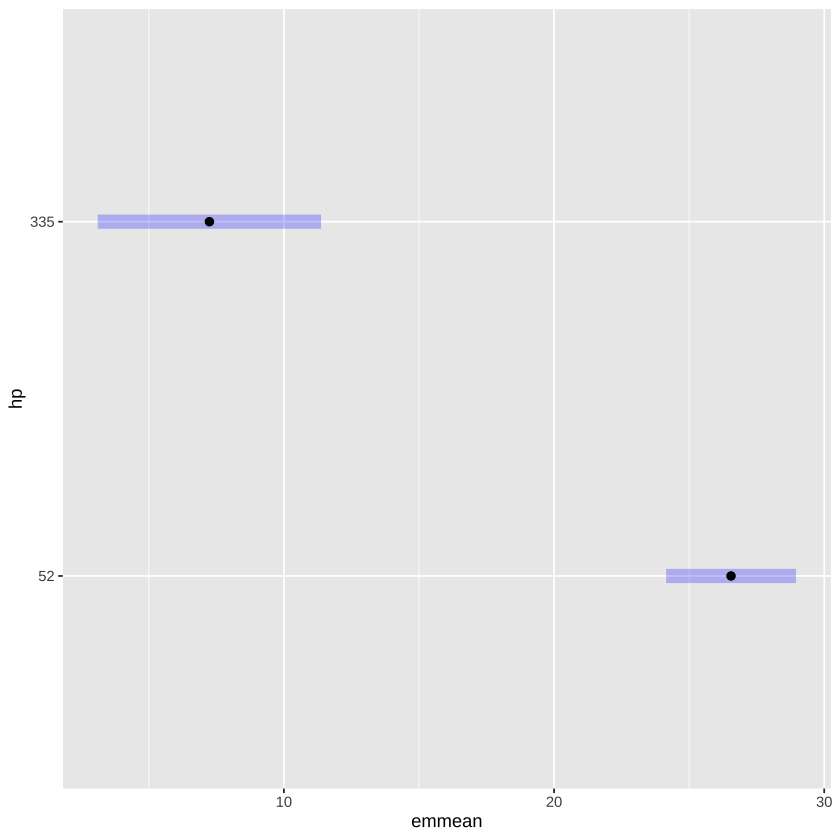

In [30]:
emmeans(m, ~ hp, cov.reduce = range) %>% plot()

Data points may overlap. Use the `jitter` argument to add some amount of
  random variation to the location of data points and avoid overplotting.



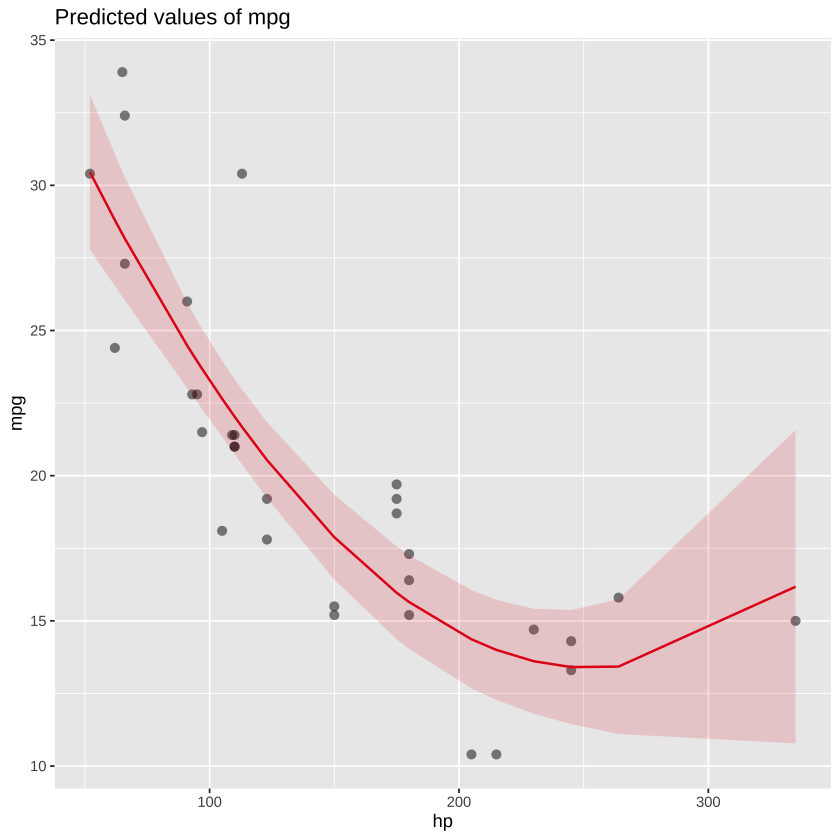

In [31]:
m1<- lm(mpg ~poly(hp, 2), d)
plot_model(m1, type = "pred", terms = "hp", show.data = T)

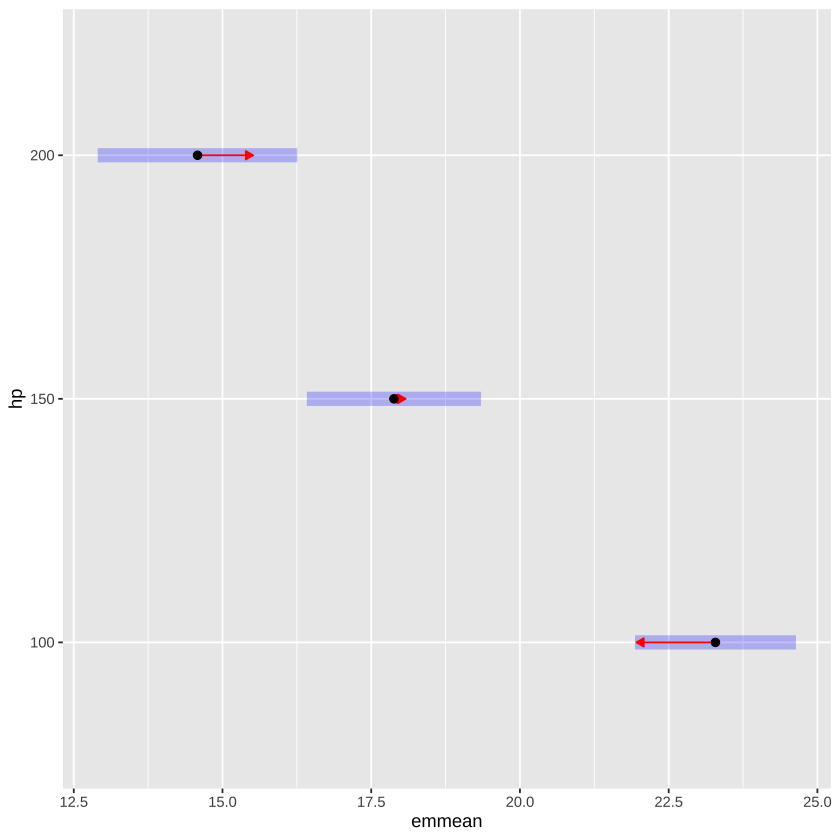

In [32]:
emmeans(m1, ~ hp, at = list(hp = c(100, 150, 200))) %>% plot(comparisons = T)

In [33]:
emmeans(m1, pairwise ~ hp, at = list(hp = c(100, 150, 200)))

$emmeans
  hp emmean    SE df lower.CL upper.CL
 100   23.3 0.662 29     21.9     24.6
 150   17.9 0.715 29     16.4     19.3
 200   14.6 0.820 29     12.9     16.3

Confidence level used: 0.95 

$contrasts
 contrast      estimate    SE df t.ratio p.value
 hp100 - hp150     5.41 0.616 29   8.768  <.0001
 hp100 - hp200     8.71 0.919 29   9.477  <.0001
 hp150 - hp200     3.30 0.404 29   8.173  <.0001

P value adjustment: tukey method for comparing a family of 3 estimates

## one categorical + one numeric

In [34]:
library(ISLR)
set.seed (10)
salary <- Wage %>% 
group_by(jobclass) %>% sample_n(50)

In [35]:
m <- lm(wage ~ jobclass + age, salary)

In [36]:
ref_grid(m)

 jobclass        age prediction   SE df
 1. Industrial  41.4       99.9 5.33 97
 2. Information 41.4      116.4 5.33 97


In [37]:
mno_age <- lm(wage ~ jobclass, salary)

In [38]:
AIC(m, mno_age)

,df,AIC
,<dbl>,<dbl>
m,4,1014.413
mno_age,3,1020.342


In [39]:
emmeans(m, ~jobclass)

 jobclass       emmean   SE df lower.CL upper.CL
 1. Industrial    99.9 5.33 97     89.4      111
 2. Information  116.4 5.33 97    105.8      127

Confidence level used: 0.95 

In [40]:
emmeans(m, pairwise ~ age|jobclass,
at = list(age = c(25,50,70)))$contrasts

jobclass = 1. Industrial:
 contrast      estimate    SE df t.ratio p.value
 age25 - age50    -22.8  8.06 97  -2.829  0.0155
 age25 - age70    -41.0 14.50 97  -2.829  0.0155
 age50 - age70    -18.2  6.45 97  -2.829  0.0155

jobclass = 2. Information:
 contrast      estimate    SE df t.ratio p.value
 age25 - age50    -22.8  8.06 97  -2.829  0.0155
 age25 - age70    -41.0 14.50 97  -2.829  0.0155
 age50 - age70    -18.2  6.45 97  -2.829  0.0155

P value adjustment: tukey method for comparing a family of 3 estimates 

In [41]:
emmeans(m, pairwise ~ age|jobclass,
at = list(age = c(25,50,70)))$emmeans

jobclass = 1. Industrial:
 age emmean    SE df lower.CL upper.CL
  25     85  7.33 97     70.4     99.5
  50    108  6.12 97     95.6    119.9
  70    126 10.86 97    104.5    147.6

jobclass = 2. Information:
 age emmean    SE df lower.CL upper.CL
  25    101  7.67 97     86.2    116.6
  50    124  5.90 97    112.5    135.9
  70    142 10.44 97    121.7    163.2

Confidence level used: 0.95 

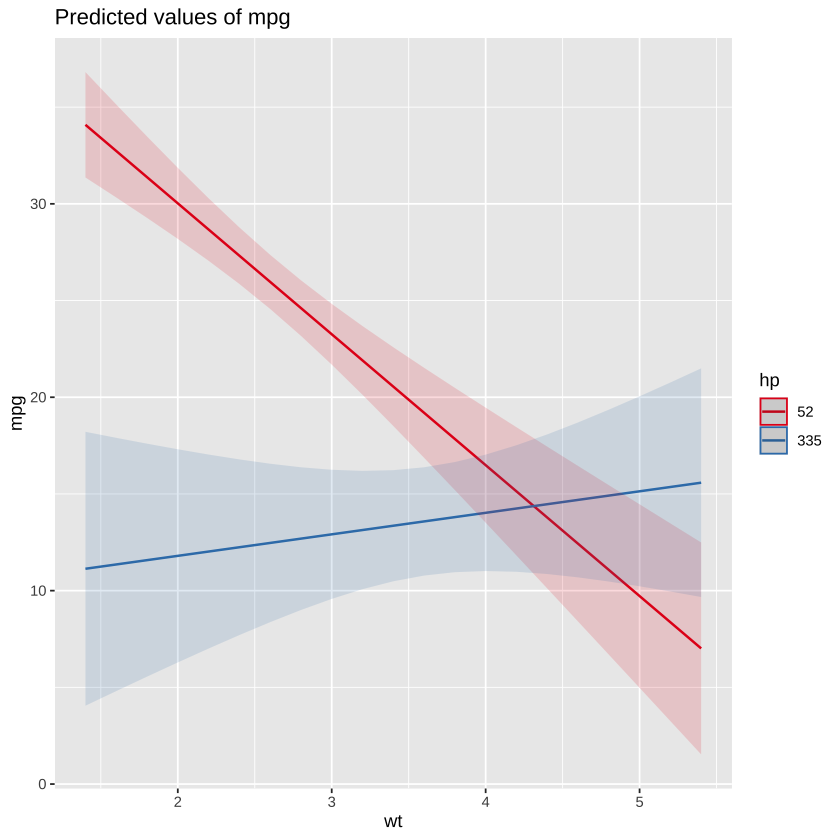

In [42]:
lm(mpg ~ hp * wt, d) %>% 
plot_model(type = "pred", terms = c( "wt", "hp[52,335]"))

In [43]:
lm(mpg ~ hp * wt, d) %>%
  emmeans(pairwise ~ hp | wt, cov.reduce = range.default)$contrasts

ERROR: Error in `$`(., emmeans(pairwise ~ hp | wt, cov.reduce = range.default), : 3 Argumente an '$' übergeben, welches 2 benötigt


In [ ]:
set.seed(9999)
salary <- Wage %>% 
sample_n(100)
m <- lm(wage ~ education, salary)

In [ ]:
m <- lm(wage ~ education, salary)

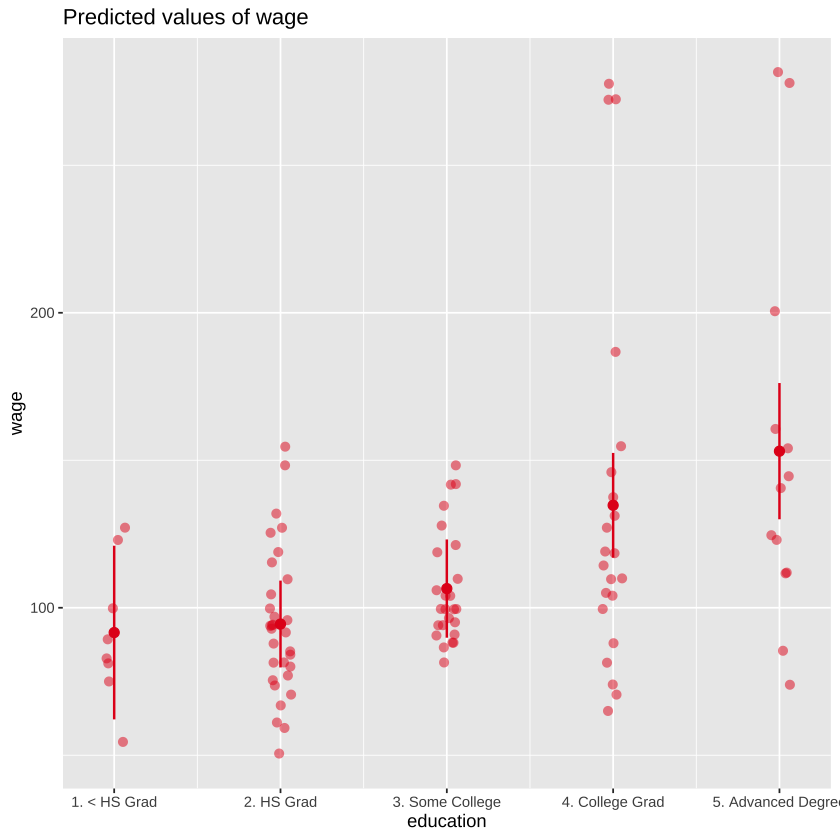

In [ ]:
plot_model(m, type = "pred" ,term = "education",
show.data = T, jitter = T)

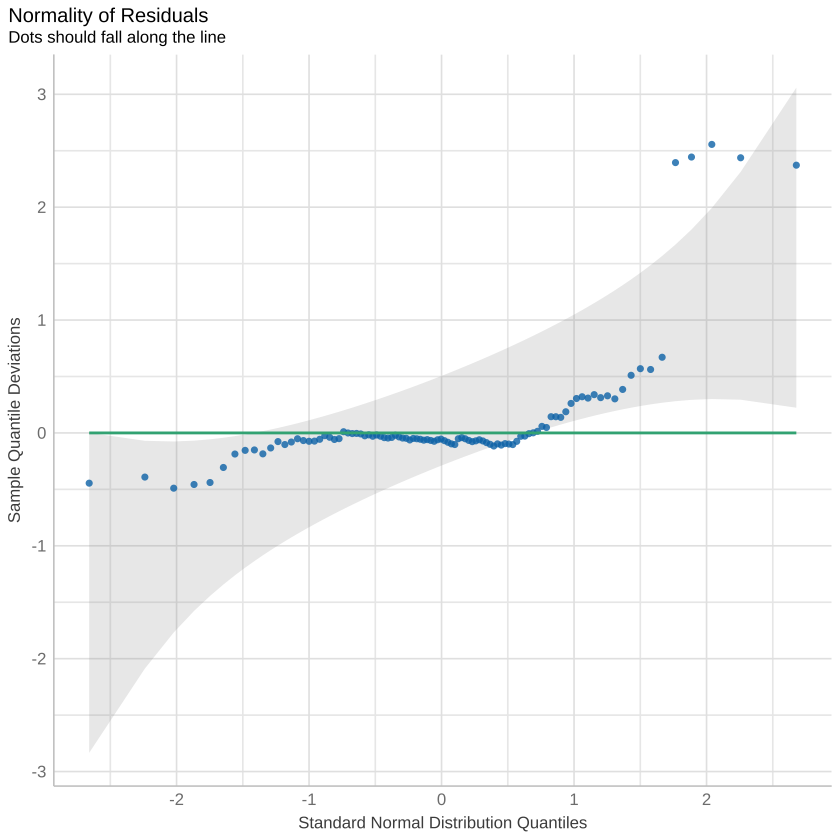

In [ ]:
library(see)
check_normality(m) %>% plot(type = "qq")

In [ ]:
###bootstrapping##
boot_data <- bootstraps(salary, times = 1000)
boot_data$splits[[1]]
boot_models <- boot_data %>% 
mutate(model = map(splits, ~ lm(wage ~ 0 + education, data = salary)),
coefs = map(model, tidy))

In [ ]:
boot_data$splits[[1]]

<Analysis/Assess/Total>
<100/35/100>

In [ ]:
boot_models <- boot_data %>% 
mutate(model = map(splits, ~ lm(wage ~ 0 + education, data = salary)),
coefs = map(model, tidy))

In [ ]:
dlookr::describe(iris)

described_variables,n,na,mean,sd,se_mean,IQR,skewness,kurtosis,p00,⋯,p40,p50,p60,p70,p75,p80,p90,p95,p99,p100
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sepal.Length,150,0,5.843333,0.8280661,0.06761132,1.3,0.3149110,-0.552064,4.3,⋯,5.60,5.80,6.10,6.3,6.4,6.52,6.90,7.255,7.700,7.9
Sepal.Width,150,0,3.057333,0.4358663,0.03558833,0.5,0.3189657,0.228249,2.0,⋯,3.00,3.00,3.10,3.2,3.3,3.40,3.61,3.800,4.151,4.4
Petal.Length,150,0,3.758000,1.7652982,0.14413600,3.5,-0.2748842,-1.402103,1.0,⋯,3.90,4.35,4.64,5.0,5.1,5.32,5.80,6.100,6.700,6.9
Petal.Width,150,0,1.199333,0.7622377,0.06223645,1.5,-0.1029667,-1.340604,0.1,⋯,1.16,1.30,1.50,1.8,1.8,1.90,2.20,2.300,2.500,2.5


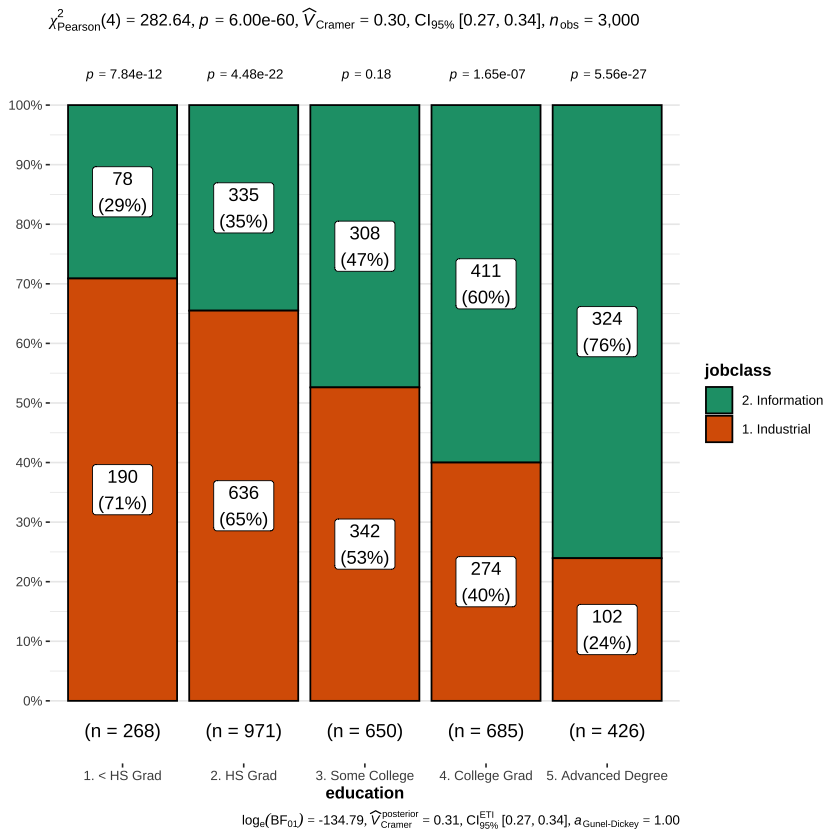

In [ ]:
ggbarstats(data = Wage, x = jobclass, y = education, label = "both")

In [ ]:
dlookr::describe(iris)

described_variables,n,na,mean,sd,se_mean,IQR,skewness,kurtosis,p00,⋯,p40,p50,p60,p70,p75,p80,p90,p95,p99,p100
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sepal.Length,150,0,5.843333,0.8280661,0.06761132,1.3,0.3149110,-0.552064,4.3,⋯,5.60,5.80,6.10,6.3,6.4,6.52,6.90,7.255,7.700,7.9
Sepal.Width,150,0,3.057333,0.4358663,0.03558833,0.5,0.3189657,0.228249,2.0,⋯,3.00,3.00,3.10,3.2,3.3,3.40,3.61,3.800,4.151,4.4
Petal.Length,150,0,3.758000,1.7652982,0.14413600,3.5,-0.2748842,-1.402103,1.0,⋯,3.90,4.35,4.64,5.0,5.1,5.32,5.80,6.100,6.700,6.9
Petal.Width,150,0,1.199333,0.7622377,0.06223645,1.5,-0.1029667,-1.340604,0.1,⋯,1.16,1.30,1.50,1.8,1.8,1.90,2.20,2.300,2.500,2.5


In [ ]:
dlookr::univar_numeric(iris)

described_variables,n,na,mean,sd,se_mean,IQR,skewness,kurtosis,median
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sepal.Length,150,0,5.843333,0.8280661,0.06761132,1.3,0.3149110,-0.552064,5.80
Sepal.Width,150,0,3.057333,0.4358663,0.03558833,0.5,0.3189657,0.228249,3.00
Petal.Length,150,0,3.758000,1.7652982,0.14413600,3.5,-0.2748842,-1.402103,4.35
Petal.Width,150,0,1.199333,0.7622377,0.06223645,1.5,-0.1029667,-1.340604,1.30


In [ ]:
dlookr::diagnose_numeric(iris)

variables,min,Q1,mean,median,Q3,max,zero,minus,outlier
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
Sepal.Length,4.3,5.1,5.843333,5.80,6.4,7.9,0,0,0
Sepal.Width,2.0,2.8,3.057333,3.00,3.3,4.4,0,0,4
Petal.Length,1.0,1.6,3.758000,4.35,5.1,6.9,0,0,0
Petal.Width,0.1,0.3,1.199333,1.30,1.8,2.5,0,0,0


In [ ]:
library(SmartEDA)
ExpNumStat(iris, by = "GA" ,gp = "Species") 

,Vname,Group,TN,nNeg,nZero,nPos,NegInf,PosInf,NA_Value,Per_of_Missing,sum,min,max,mean,median,SD,CV,IQR,Skewness,Kurtosis
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,Petal.Length,Species:All,150,0,0,150,0,0,0,0,563.7,1.0,6.9,3.758,4.35,1.765,0.470,3.500,-0.272,-1.396
7,Petal.Length,Species:setosa,50,0,0,50,0,0,0,0,73.1,1.0,1.9,1.462,1.50,0.174,0.119,0.175,0.103,0.805
11,Petal.Length,Species:versicolor,50,0,0,50,0,0,0,0,213.0,3.0,5.1,4.260,4.35,0.470,0.110,0.600,-0.588,-0.074
15,Petal.Length,Species:virginica,50,0,0,50,0,0,0,0,277.6,4.5,6.9,5.552,5.55,0.552,0.099,0.775,0.533,-0.256
4,Petal.Width,Species:All,150,0,0,150,0,0,0,0,179.9,0.1,2.5,1.199,1.30,0.762,0.636,1.500,-0.102,-1.336
8,Petal.Width,Species:setosa,50,0,0,50,0,0,0,0,12.3,0.1,0.6,0.246,0.20,0.105,0.428,0.100,1.216,1.434
12,Petal.Width,Species:versicolor,50,0,0,50,0,0,0,0,66.3,1.0,1.8,1.326,1.30,0.198,0.149,0.300,-0.030,-0.488
16,Petal.Width,Species:virginica,50,0,0,50,0,0,0,0,101.3,1.4,2.5,2.026,2.00,0.275,0.136,0.500,-0.126,-0.661
1,Sepal.Length,Species:All,150,0,0,150,0,0,0,0,876.5,4.3,7.9,5.843,5.80,0.828,0.142,1.300,0.312,-0.574


In [ ]:
library(summarytools)
dfSummary(airquality)

,No,Variable,Stats / Values,Freqs (% of Valid),Graph,text.graph,Valid,Missing
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,Ozone\ [integer],Mean (sd) : 42.1 (33)\ min < med < max:\ 1 < 31.5 < 168\ IQR (CV) : 45.2 (0.8),67 distinct values,"<img style=""border:none;background-color:transparent;padding:0;max-width:max-content;"" src=""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJgAAABuCAQAAABxABKuAAAAAmJLR0QA/4ePzL8AAAAHdElNRQfoBQQJAB/zmB0SAAAExHpUWHRSYXcgcHJvZmlsZSB0eXBlIGljYwAASImVV9nRwygMfqeKLYFDElCODXhm+29gP3E4ceL8m5BhwEISulHMv6WYfzBczt5YHbEkcdFGK8V630FSpUWKnj1FAowTZ95wFmvGMTZO1x3rpqsRJyGGaMmxZUvFznEy/mIcuFUlcgtQg6+/MHge5kf8XUg4Bgn9y9k0wHIYIQVLHQdxHHDaoLCNPlL/huaDIKQYYTm74GFK7sjAnN2M44DtOpD4DBc64Rf8efFkRPDMEDWmZZsGKeHJySDmCfdFPuAb3HzP6NkW53BEUVgazrxkCQiLGR6GYQk5RAAuwvZ2fCZ/UJvP5L+N/3U/Yq1EflPxmJsC9XcOtE9GfljfJYJtoAntEz6M7bYC4ztiDld4hUMls1Az14OjxwghwyZcxuISpNqZaWaBH+73oYlED7/wVSIPl4OEEvMVnm3cJMG/cao2LvJ7kl0O2nlmv3Xz5rLBN54aHVeJmtXUpjADcZWIYAVXM2Uqi1EbBz6pO+HcxWioHEg0rmC7JemItyCbZJgiM11VC1lQUgReWASnRKoaBWoX1cLewMrRxsv9bogcqkXgFYqnsSdB29QJqFdXlckWmKLAFOUqEQWvifHk5pMgkhqb0kVl4q1XUTqNPW+m2DTcEUz5esFm4U0Pb/orvCQtglpZF6NhPEiOGsTsT/cPQnZFc41fJWXEkcMFTNFcD7RssCAaEHiagwKbiJ97MBEY+6i99luVDvFryeu30fKH6ScRGArU0pqtSJ1BG2tcDMsNo/oHI9XuZPAEf5cGcFVt3drSJMpDDQqubTzqb0fGeStTwvTK0AyAVkg9jEuV+JtEdJEoXyWCqoRHjrpwYa67JTyihMilkDBzZ0ThMDjQTcNKEzl3greb+YMtTxupJK8SRTfV5AdDhEVnWNxgoG+bzH1zZtrk0NfuXv97r2bkJ1IyLXyjBMkjXw59H8qRjgOJFcte3Jtn9LsiH/bEpQZbFG/F25KIn9RSQ9/YyNc/gvcw36bARybcCDMZyxC2f6CB4nofJ1z3fjZmvvOg+Svsb3JtRf30Vp+njeokyE9Edx6sn2Opl9q7A/3+TUqVSJuAlnvdfhCuUBBOkdohWvaT97dmCLZGE2xDSFSUvs1hIknajtck4IVgzIqZMTcbymCiTVpAdIf9wCo2bFj33dzn1Pd1aKlqbrP+4ZWFuBwy7fN9hRwltQGpud02D41RHRrameYZ+zcJh2oNdacFB4QExDiJ9ve6/UnFz+7X6F37lxj7TbUnhrevCaLF1pHckudz9GVyWl7M1DnxwbRXCzdzTRFi/pvRizqEVggPDUq0lmZk/1MBf6nf6Sz2bzZ5V9c84ufeGx+cwVZIJ2G6YSNBYymQSiCmaNsxDt6YCsKiEypu3/dGI+o/BKTj2WdTkAPNVO69fUQTA/qAOMQv+v7AaQMj4E4ZzVXwzRcPIwOGFaotshj0s///wB8FdM/oTNDxPf6CPo0j9D5p/WF04HaYO0S0l/3/W6htNqn1liH6ta7ehv6/q+a027tB9Gn0lo5z7x33FARtcpfYXgfiyJV+e1ScEJ45OVtofHNth44wG7KYO/yo2XX4vnnTN3ULU4XeAhaY1fwHgKhVukzXieYAAAF/SURBVHja7d1NTsJQGEBRatije9D14B5cpU7rpM9DSH/vmREgaW76Na9QyvRzi3jbegOOpmCoYOg+f/A1PKB9Tltv8BbmWe5/n3pffOP31lu+A40kKhgqGCoYKhgqGLrbyx+LK7UrrNIw2NI67RqrtEYSFQwVDBUMFQwVDBUMFQwVDBUMFQwVDBUMFQwVDBUMFQwVDBUMFQwVDBUMFQwVDBUMFQwVDBUMFQwVDBUMFQwVDBUMFQwVDBUMFQwVDBUMFQwVDBUMFQwVDBUMFQwVDBUMFQzhT5if9zjJfX1WC3aW+/o0kuile9h47I7vpcGucJOGRhIVDBUMFQwVDBUMFQwVDBUMFQwVDK348c7IMe6vuKNgxzh1byRRwVDBUMFQwVDBUMFQwVDBUMFQwVDB0I5OvpeNLkNY69OMwwTby7U/jSQqGCoYKhg6zEF/ZK1vBE4TbK1vBE4T7Hn/uNB0tn8W7GZrvA76aJrvj+M/Fb6mj9lITjUyjSQqGCoY+gUKdx4gjO4NwwAAADhlWElmTU0AKgAAAAgAAYdpAAQAAAABAAAAGgAAAAAAAqACAAQAAAABAAAAlqADAAQAAAABAAAAbgAAAABMx3GGAAAAJXRFWHRkYXRlOmNyZWF0ZQAyMDI0LTA1LTA0VDA5OjAwOjMxKzAwOjAwFesycAAAACV0RVh0ZGF0ZTptb2RpZnkAMjAyNC0wNS0wNFQwOTowMDozMSswMDowMGS2iswAAAAodEVYdGRhdGU6dGltZXN0YW1wADIwMjQtMDUtMDRUMDk6MDA6MzErMDA6MDAzo6sTAAAAEnRFWHRleGlmOkV4aWZPZmZzZXQAMjZTG6JlAAAAGHRFWHRleGlmOlBpeGVsWERpbWVuc2lvbgAxNTA7RbQoAAAAGHRFWHRleGlmOlBpeGVsWURpbWVuc2lvbgAxMTDCJpBaAAAAAElFTkSuQmCC"">",: .\ : :\ : :\ : : : :\ : : : : : . .,116\ (75.8%),37\ (24.2%)
2,2,Solar.R\ [integer],Mean (sd) : 185.9 (90.1)\ min < med < max:\ 7 < 205 < 334\ IQR (CV) : 143 (0.5),117 distinct values,"<img style=""border:none;background-color:transparent;padding:0;max-width:max-content;"" src=""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJgAAABuCAQAAABxABKuAAAAAmJLR0QA/4ePzL8AAAAHdElNRQfoBQQJAB/zmB0SAAAExHpUWHRSYXcgcHJvZmlsZSB0eXBlIGljYwAASImVV9nRwygMfqeKLYFDElCODXhm+29gP3E4ceL8m5BhwEISulHMv6WYfzBczt5YHbEkcdFGK8V630FSpUWKnj1FAowTZ95wFmvGMTZO1x3rpqsRJyGGaMmxZUvFznEy/mIcuFUlcgtQg6+/MHge5kf8XUg4Bgn9y9k0wHIYIQVLHQdxHHDaoLCNPlL/huaDIKQYYTm74GFK7sjAnN2M44DtOpD4DBc64Rf8efFkRPDMEDWmZZsGKeHJySDmCfdFPuAb3HzP6NkW53BEUVgazrxkCQiLGR6GYQk5RAAuwvZ2fCZ/UJvP5L+N/3U/Yq1EflPxmJsC9XcOtE9GfljfJYJtoAntEz6M7bYC4ztiDld4hUMls1Az14OjxwghwyZcxuISpNqZaWaBH+73oYlED7/wVSIPl4OEEvMVnm3cJMG/cao2LvJ7kl0O2nlmv3Xz5rLBN54aHVeJmtXUpjADcZWIYAVXM2Uqi1EbBz6pO+HcxWioH

In [ ]:
library(gtsummary)
mtcars %>% 
select(mpg,hp,am,gear,cyl) %>% tbl_summary()

#Wage %>%
  #select(age, wage, education,jobclass) %>%
  #tbl_summary(by = education) %>%
  #add_p()

<div id="xouyadoitr" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
  <style>#xouyadoitr table {
  font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}

#xouyadoitr thead, #xouyadoitr tbody, #xouyadoitr tfoot, #xouyadoitr tr, #xouyadoitr td, #xouyadoitr th {
  border-style: none;
}

#xouyadoitr p {
  margin: 0;
  padding: 0;
}

#xouyadoitr .gt_table {
  display: table;
  border-collapse: collapse;
  line-height: normal;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  b

In [ ]:
library(DataExplorer)

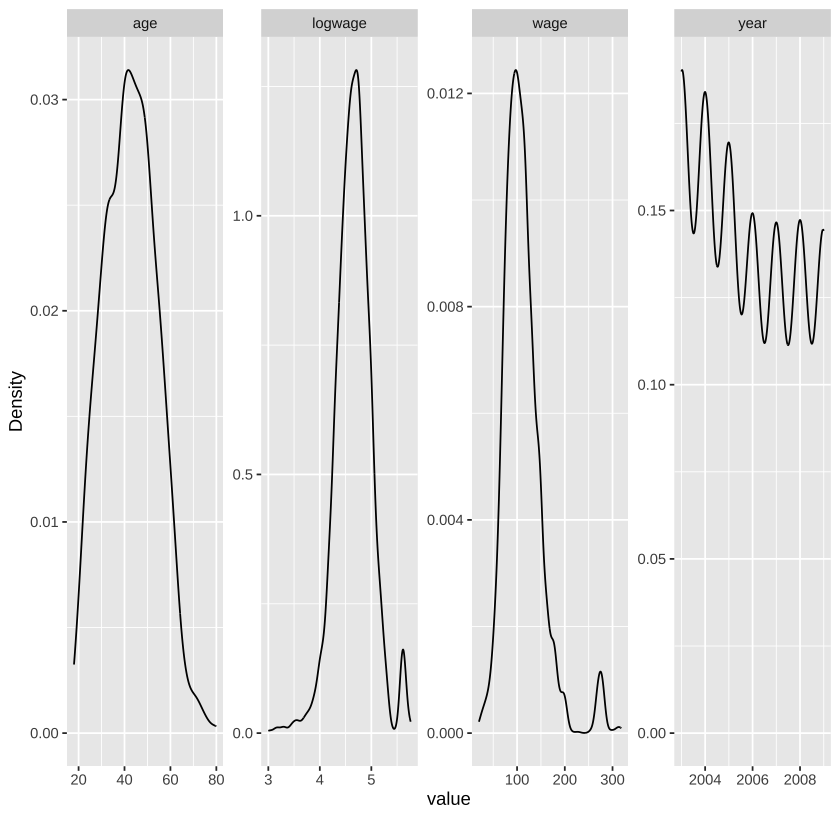

In [ ]:
plot_density(Wage)

In [ ]:
skewness(airquality$Ozone)
agostino.test(airquality$Ozone)


[1] NA


	D'Agostino skewness test

data:  airquality$Ozone
skew = 1.2257, z = 4.6564, p-value = 3.219e-06
alternative hypothesis: data have a skewness


In [ ]:


skewness(airquality$Wind)
agostino.test(airquality$Wind)

[1] 0.3443985


	D'Agostino skewness test

data:  airquality$Wind
skew = 0.3444, z = 1.7720, p-value = 0.07639
alternative hypothesis: data have a skewness


In [ ]:
anscombe.test(airquality$Ozone)
anscombe.test(airquality$Wind)


	Anscombe-Glynn kurtosis test

data:  airquality$Ozone
kurt = 4.1841, z = 2.2027, p-value = 0.02762
alternative hypothesis: kurtosis is not equal to 3



	Anscombe-Glynn kurtosis test

data:  airquality$Wind
kurt = 3.0688, z = 0.4478, p-value = 0.6543
alternative hypothesis: kurtosis is not equal to 3


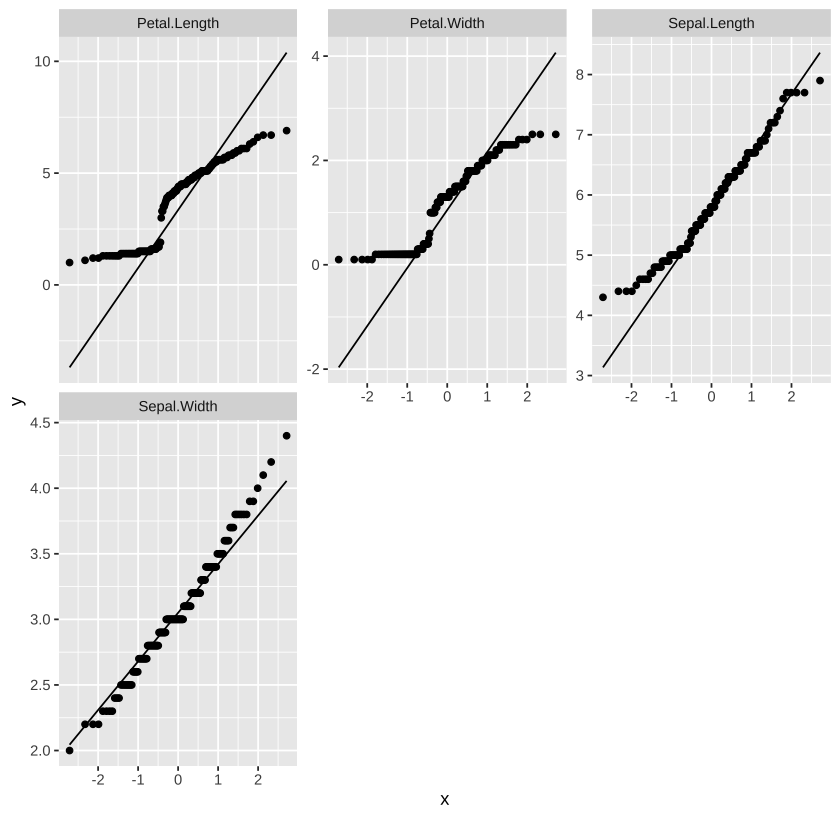

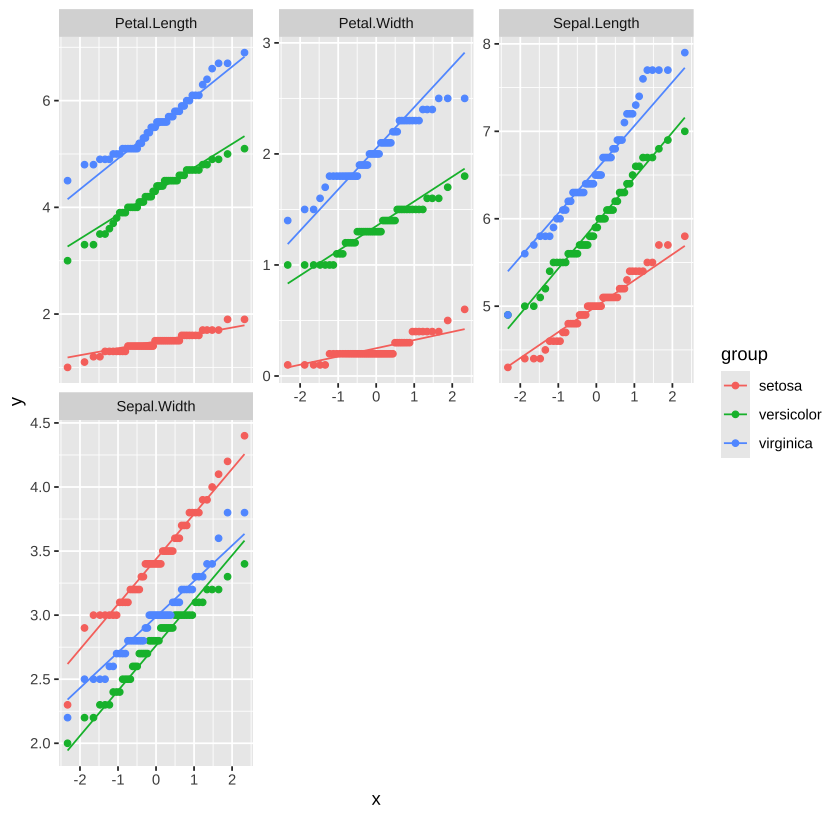

In [ ]:
library(DataExplorer)
plot_qq(iris)
plot_qq(iris, by = "Species")

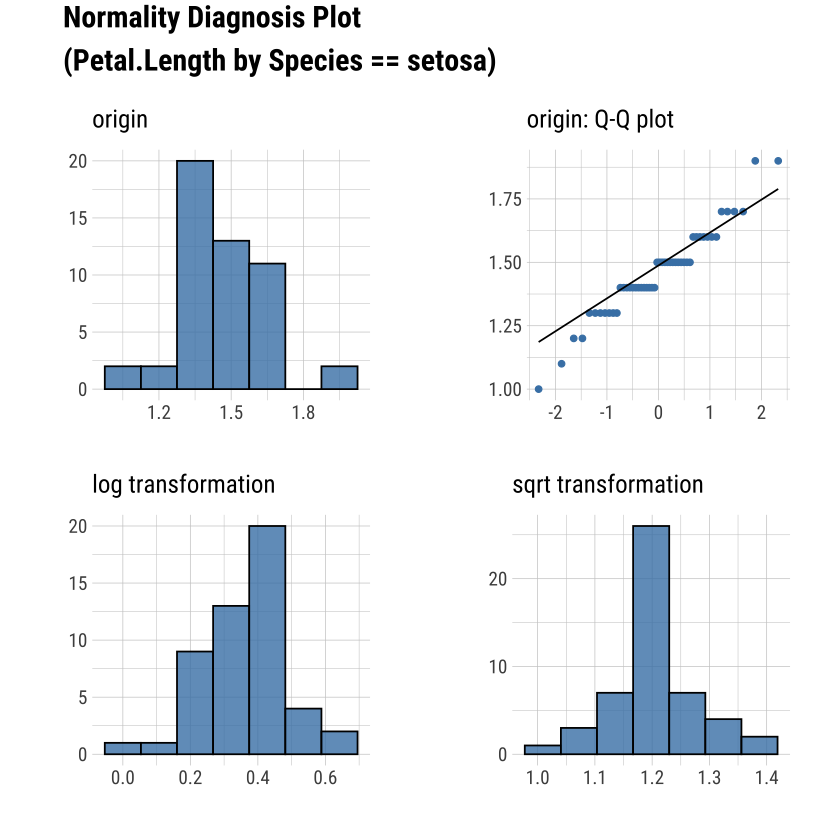

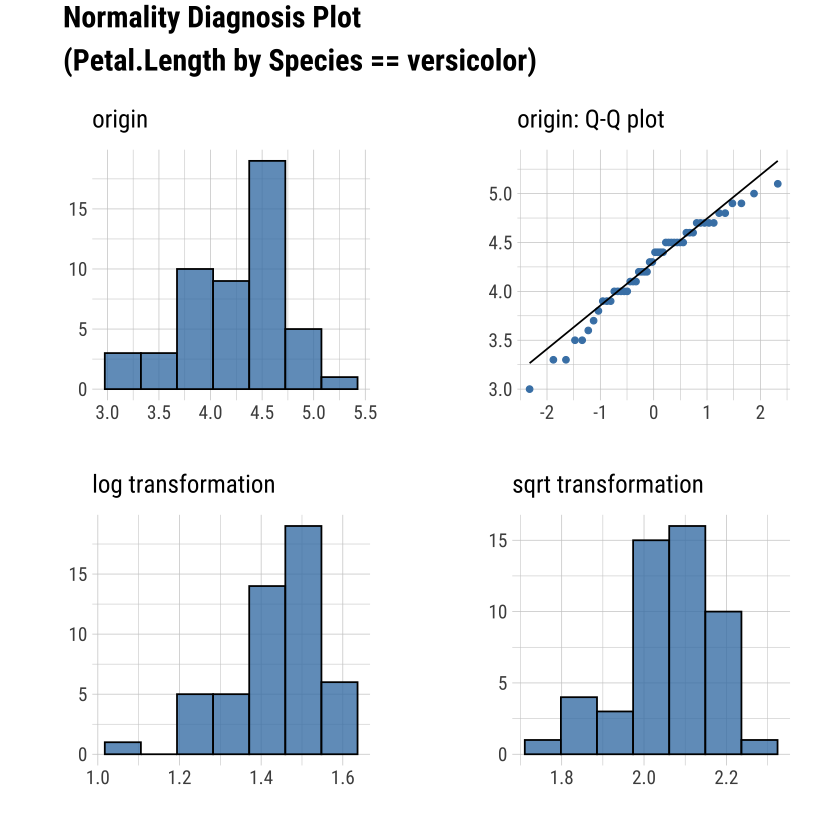

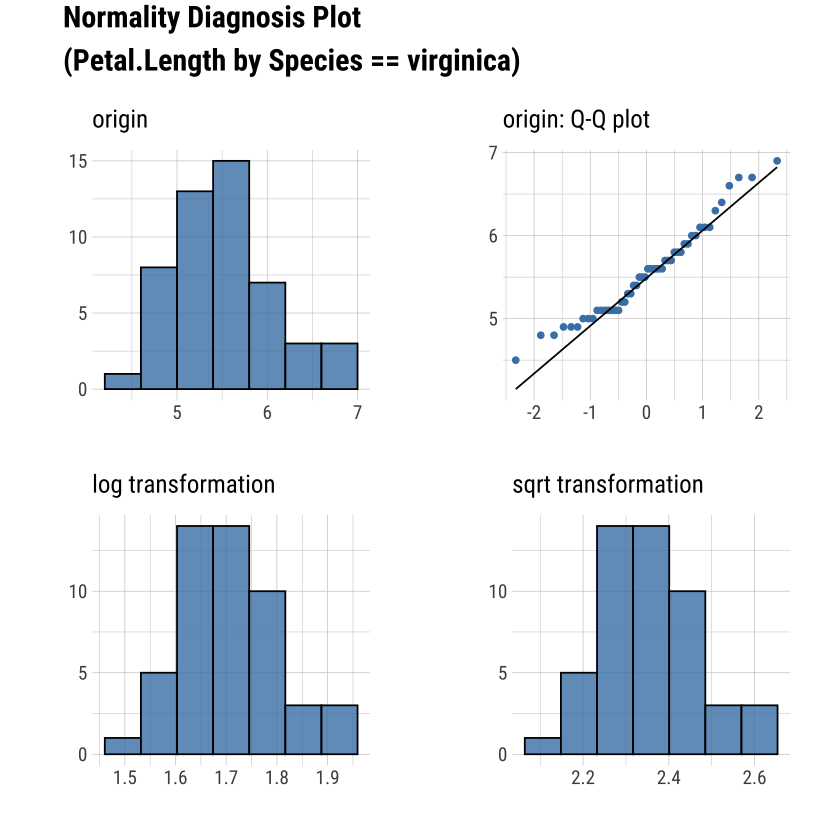

In [ ]:
iris %>% group_by(Species) %>% 
plot_normality(Petal.Length)

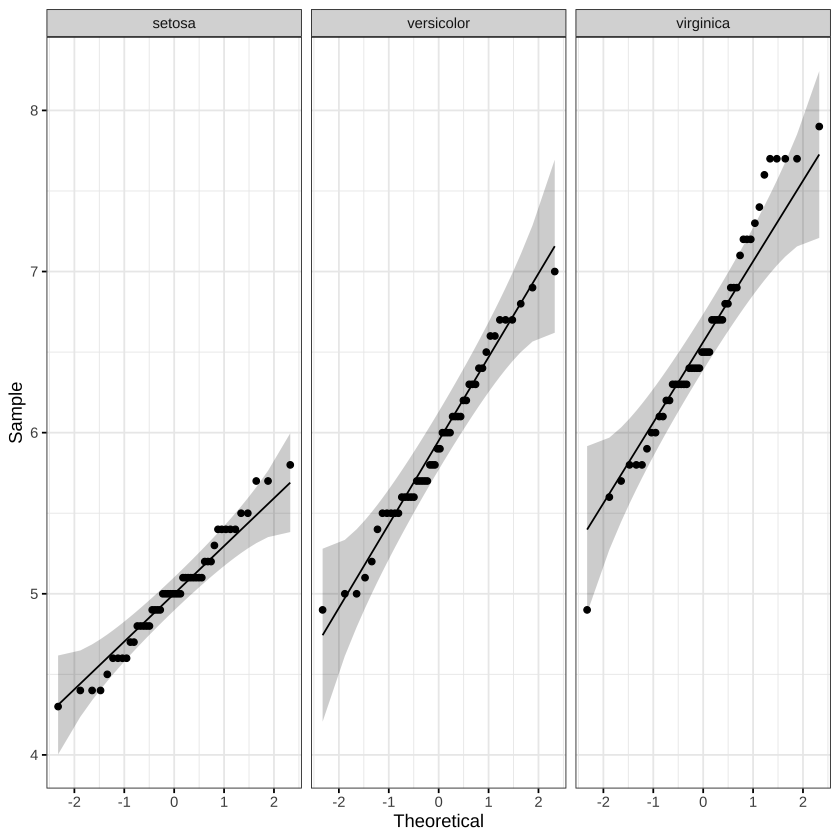

In [ ]:
library(ggpubr)
ggqqplot(iris, x = "Sepal.Length", facet.by = "Species", ggtheme = theme_classic()())

In [ ]:
normality(airquality) %>% 
mutate_if(is.numeric, ~ round (., 3)) %>% flextable()


a flextable object.
col_keys: `vars`, `statistic`, `p_value`, `sample` 
header has 1 row(s) 
body has 6 row(s) 
original dataset sample: 
     vars statistic p_value sample
1   Ozone     0.879   0.000    153
2 Solar.R     0.942   0.000    153
3    Wind     0.986   0.118    153
4    Temp     0.976   0.009    153
5   Month     0.888   0.000    153

In [ ]:
diamonds %>% 
group_by (cut, color, clarity) %>% 
normality()

variable,cut,color,clarity,statistic,p_value,sample
<chr>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<dbl>
carat,Fair,D,I1,0.8878083,3.730576e-01,4
carat,Fair,D,SI2,0.8670496,1.831460e-05,56
carat,Fair,D,SI1,0.8485305,3.786243e-06,58
carat,Fair,D,VS2,0.9310790,9.204221e-02,25
carat,Fair,D,VS1,0.9727420,8.925434e-01,5
carat,Fair,D,VVS2,0.8713176,1.270122e-01,9
carat,Fair,D,VVS1,0.9312567,4.933329e-01,3
carat,Fair,D,IF,0.9897260,8.060825e-01,3
carat,Fair,E,I1,0.9413556,5.962394e-01,9


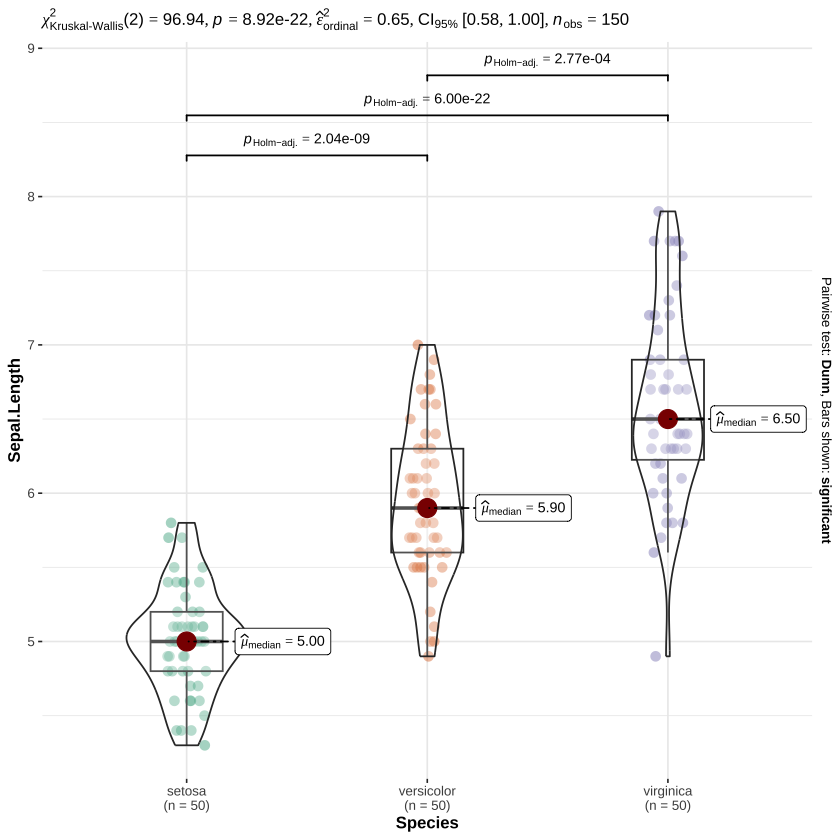

In [ ]:
ggbetweenstats(data = iris, x = Species, y = Sepal.Length, type = "np")

Warning message:
“'plot_correlate' ist veraltet.
Benutzen Sie stattdessen 'plot.correlate'
Siehe help("Deprecated")”


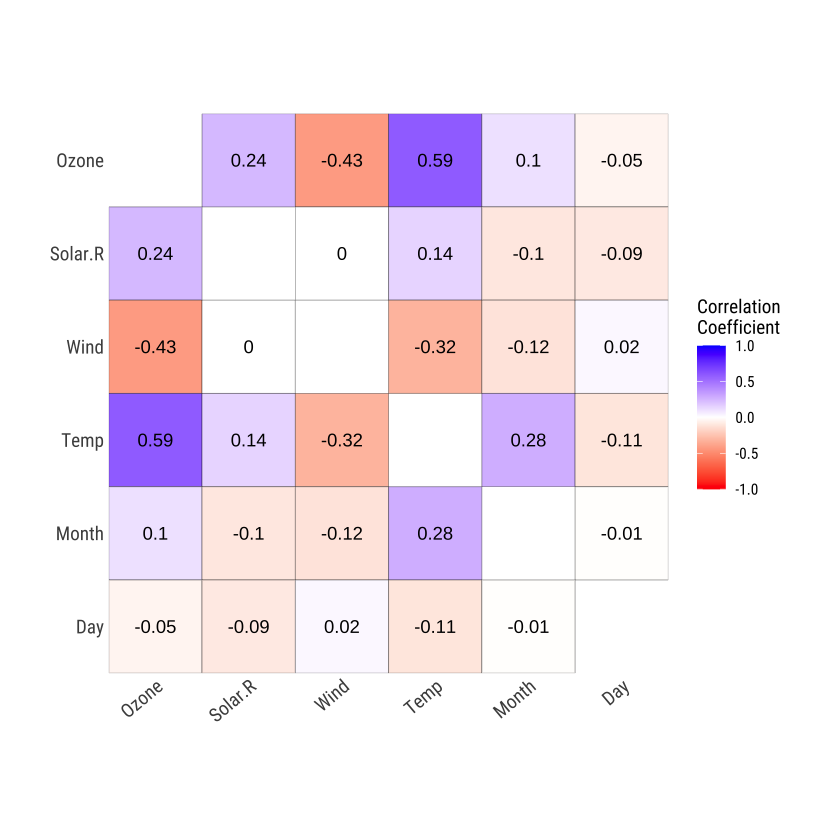

In [ ]:

plot_correlate(airquality,method = "kendall")

#### Wilcoxon Rank sum test #### 
#### Mann-whitney test ####